# Ramen Rating and its Features

This notebook is a data-science exercise for analyzing the real data from Kaggle 

https://www.kaggle.com/residentmario/ramen-ratings

The data includes the brand, variety, style and location of the instant ramen with the final rating (stars) for over 2500 reviews. I will try to study if there are a particular combination which may lead to a higher rating. My aim is to find out which location produces ramen which has a high rating in general. This will mean that when the production place is given, there is a high statistical chance that the ramens are well accepted and they are not statistical outlier. 

Written by Shing Chi Leung at 29 January 2021

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


# 1. Data Extraction and Basic Features

I define some constants which map the column for the global data modification

In [63]:
ID = 0
BRAND = 1
NAME = 2
TYPE = 3
LOCATION = 4
RATING = 5

In [60]:
file_path = "gdrive/MyDrive/Colab Notebooks/ramen-ratings.csv"

def read_file(file_path):

  raw_data = []
  with open(file_path,"r") as f:

    f.readline()

    i = 0
    # only fetch the data when there is a rating
    for line in f.readlines():

      if i == 2580:
        break

      new_line = line.strip().split(",")

      # convert data manually 
      if new_line[5].isdigit():
        new_line[ID] = int(new_line[ID])
        new_line[RATING] = float(new_line[RATING])
        raw_data.append(new_line[0:6])

    return raw_data

raw_data = read_file(file_path)
print("First 2 rows of data: \n{}".format(raw_data[:2]))

First 2 rows of data: 
[[2579, 'Just Way', 'Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles', 'Pack', 'Taiwan', 1.0], [2574, 'Acecook', 'Spice Deli Tantan Men With Cilantro', 'Cup', 'Japan', 4.0]]


Extract the brand and location of the data and put them into a dictionary for statistical analysis

In [61]:
def extract_brands(raw_data):

  brands = {}

  for row in raw_data:
    brand = row[BRAND]
    if brand not in brands:
      brands[brand] = 1
    else:
      brands[brand] += 1

  return brands

brands = extract_brands(raw_data)
print("Number of noodles produced by Samyang is {}.".format(brands["Samyang"]))

Number of noodles produced by Samyang is 4.


In [64]:
def extract_locations(raw_data):

  locations = {}

  for row in raw_data:
    location = row[LOCATION]
    if location not in locations:
      locations[location] = 1
    else:
      locations[location] += 1

  return locations

locations = extract_locations(raw_data)
print("Number of noodles by Japan is {}".format(locations["Japan"]))

Number of noodles by Japan is 149


# 2. Analysis Using Pandas on Production Location

I will use pandas to see if I can get identical results instead of the explicit methods above.

Header of the data file: 
             id      brand  ... package rating
location                    ...               
Australia  2068      Maggi  ...    Pack    5.0
Australia  2301     Suimin  ...     Cup    3.0
Australia  2219  Fantastic  ...     Cup    1.0
Australia  2274     Suimin  ...     Cup    4.0
Australia  2253   Singa-Me  ...     Cup    4.0

[5 rows x 5 columns]

 locations with more than 10 brands of noodles: 
             count
country           
Japan          149
USA            121
South Korea    120
Taiwan          93
Hong Kong       73
Thailand        73
Malaysia        72
China           64
Singapore       55
Indonesia       51



Text(0, 0.5, 'Ramen Count')

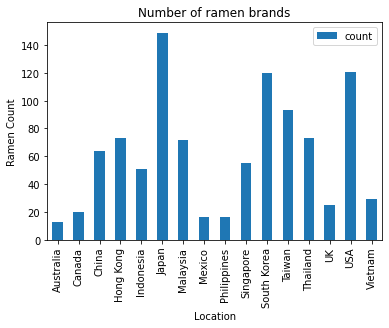

In [67]:
df = pd.DataFrame(raw_data, columns=["id", "brand", "name", "package", "location", "rating"])

df.set_index(keys=["location"], inplace=True)
df.sort_index(inplace=True)
print("Header of the data file: \n{}".format(df.head(5)))

# filter the list to only keep locations with >10 brands of ramen
df_location = pd.DataFrame(df.groupby(by="location").size())
df_location.rename(columns={0:"count"}, inplace=True)
df_location = df_country[df_country["count"]>10]
print("\n locations with more than 10 brands of noodles: \n{}\n".format(df_location.sort_values(by="count", ascending=False).head(10)))

ax = df_country.plot.bar()
ax.set_title("Number of ramen brands")
ax.set_xlabel("Location")
ax.set_ylabel("Ramen Count")

I also want to examine the average rating for each location. 


average rating of the noodles in the first 5 locations (by rating):
           avg rating
location             
Myanmar      5.000000
Cambodia     4.666667
Singapore    4.545455
Malaysia     4.513889
Sarawak      4.333333

Number of noodles brand produced in Japan is 149.



Text(0.5, 0, 'location')

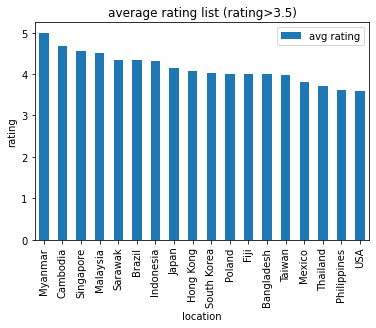

In [71]:
# compute the average per location of the ramen rating
df_location_mean = pd.DataFrame(df.groupby(by="location")["rating"].mean())
df_location_mean.rename(columns={"rating":"avg rating"}, inplace=True)
df_location_mean.sort_values(by="avg rating", ascending=False, inplace=True)
print("\naverage rating of the noodles in the first 5 locations (by rating):")
print(df_location_mean_sorted.head(5))

print("\nNumber of noodles brand produced in Japan is {}.\n".format(len(df.loc["Japan"])))

#print("List of locations in the review: \n{}".format(set(df.index)))

ax1 = df_location_mean_sorted[df_location_mean["avg rating"]>3.5].plot.bar(y="avg rating")
ax1.set_ylabel("rating")
ax1.set_title("average rating list (rating>3.5)")
ax1.set_xlabel("location")

#ax2 = df_location.plot.pie(y="count")

It seems that there is not a particular ramen-location which has a particularly higher rating. The rating is smooth with a maximum of 5 for Myanmar, but Myanmar produces only 1 ramen. This means the statistical error can be large. To further refine our study, we will focus on locations which produce a significant number of brands. 

# 3. Package Distribution within each Production Location

For each location with an average rating > 4 and has at least 10 brands of ramen, I study how they package their ramen. 

locations with an average rating > 4 are: 
             avg rating
location               
Myanmar        5.000000
Cambodia       4.666667
Singapore      4.545455
Malaysia       4.513889
Brazil         4.333333
Sarawak        4.333333
Indonesia      4.313725
Japan          4.154362
Hong Kong      4.082192
South Korea    4.033333

Final shortlist is : 
    location    brand  ... package rating
0  Hong Kong   Nissin  ...    Pack    5.0
1  Hong Kong   Nissin  ...    Bowl    4.0
2  Hong Kong  Sau Tao  ...    Pack    3.0
3  Hong Kong   Nissin  ...    Bowl    5.0
4  Hong Kong   Nissin  ...    Pack    4.0

[5 rows x 5 columns]

locations with >10 brands and have >4 rates are: 
{'South Korea', 'Hong Kong', 'Indonesia', 'Japan', 'Malaysia', 'Singapore'}



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: PerformanceWarning: indexing past lexsort depth may impact performance.


Text(0, 0.5, 'Number')

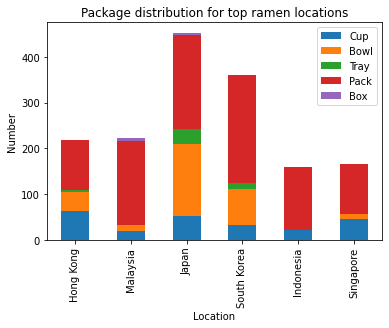

In [69]:
# extract the location list where average rating > 4
df_location_mean_gt4 = df_location_mean[df_location_mean["avg rating"]>4]
print("locations with an average rating > 4 are: \n{}".format(
    df_location_mean_gt4.sort_values(by="avg rating",ascending=False)))

# allocate DataFrame for the two lists
df_mean_gt4 = df.loc[df_location_mean_gt4.index].reset_index().set_index("id")
df_big_location = df.loc[df_location.index].reset_index().set_index("id")

# combine the two DataFrame for the final result
df_shortlist = df_big_location.merge(df_mean_gt4, how="inner")
print("\nFinal shortlist is : \n{}\n".format(df_shortlist.head(5)))

# show the locations where ramen has in general high rating and are statistically reliable
print("locations with >10 brands and have >4 rates are: \n{}\n".
      format(set(df_shortlist.set_index("location").index)))

#df_shortlist.groupby("brand").mean().sort_values(by="rating",ascending=False)

# extract the population for a given location and package
df_shortlist.set_index(["location", "package"], inplace=True)
shortlist_stat = {}
for location, package in set(df_shortlist.index):
  if location not in shortlist_stat:
    shortlist_stat[location] = {}
  shortlist_stat[location][package] = df_shortlist.loc[location,package].size
#print(shortlist_stat)

# plot the data
df_shortlist_stat = pd.DataFrame(shortlist_stat)
#print(df_shortlist_stat.head(5))
ax3 = df_shortlist_stat.T.plot.bar(stacked=True)
ax3.set_title("Package distribution for top ramen locations")
ax3.set_xlabel("Location")
ax3.set_ylabel("Number")

The list of the locations with a reliable production of ramen coincides with their food culture. In those locations, soup ramen is part of their daily lifestyle of cuisine. It is therefore natural that these locations succeed in producing the noodles with a higher quality. Also, most ramen is packaged in pack, with the exception of Japan where bowl ramen is almost equally popular. 

In [70]:
df_shortlist.groupby("package").mean()

#df_shortlist.groupby("brand").mean().sort_values(by="rating",ascending=False)

,rating
package,
Bowl,4.264706
Box,5.000000
Cup,4.103896
Pack,4.241590
Tray,4.250000
